In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [23]:
vegi_df = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/pot_car_onio_carTribe.csv")
vegi_df = vegi_df.drop(columns="Unnamed: 0")
vegi_df.head(10)

,Hight,Width,R,G,B,green pixels,Label
0,193,78,141,117,91,0,Kartoffel
1,139,55,143,111,70,0,Kartoffel
2,159,61,143,113,76,0,Kartoffel
3,144,92,126,97,66,0,Kartoffel
4,114,91,141,113,78,0,Kartoffel
5,175,64,135,108,78,0,Kartoffel
6,162,80,129,99,68,0,Kartoffel
7,142,66,102,80,62,0,Kartoffel
8,127,57,134,106,77,0,Kartoffel
9,152,67,136,111,84,0,Kartoffel


In [24]:
vegi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Hight         873 non-null    int64 
 1   Width         873 non-null    int64 
 2   R             873 non-null    int64 
 3   G             873 non-null    int64 
 4   B             873 non-null    int64 
 5   green pixels  873 non-null    int64 
 6   Label         873 non-null    object
dtypes: int64(6), object(1)
memory usage: 47.9+ KB


In [25]:
vegi_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hight,873.0,184.248568,68.712780,45.0,128.0,183.0,254.0,323.0
Width,873.0,96.712486,47.322590,25.0,58.0,85.0,123.0,255.0
R,873.0,121.221077,24.543827,48.0,106.0,124.0,140.0,189.0
G,873.0,93.816724,21.147382,40.0,79.0,92.0,109.0,155.0
B,873.0,61.222222,16.711629,12.0,51.0,60.0,71.0,143.0
green pixels,873.0,731.214204,2082.333186,0.0,0.0,0.0,193.0,14693.0


In [43]:
vegi_encoded_df = vegi_df.copy()

vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte', 'Label'] = 0
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel', 'Label'] = 1
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel', 'Label'] = 2
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte_Trieb', 'Label'] = 3

vegi_encoded_df['Label'] = vegi_encoded_df['Label'].astype('int')
vegi_encoded_df['Label'].value_counts()

Label
2    219
3    219
0    218
1    217
Name: count, dtype: int64

In [45]:
vegi_encoded_df.dtypes

Hight           int64
Width           int64
R               int64
G               int64
B               int64
green pixels    int64
Label           int32
dtype: object

In [46]:
vegi_encoded_df['Label'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 873 entries, 0 to 872
Series name: Label
Non-Null Count  Dtype
--------------  -----
873 non-null    int32
dtypes: int32(1)
memory usage: 3.5 KB


In [47]:
X = vegi_encoded_df.iloc[:,0:6]
print(X)
y = vegi_encoded_df.iloc[:,6]
print(y)

     Hight  Width    R    G   B  green pixels
0      193     78  141  117  91             0
1      139     55  143  111  70             0
2      159     61  143  113  76             0
3      144     92  126   97  66             0
4      114     91  141  113  78             0
..     ...    ...  ...  ...  ..           ...
868    254    240  100   95  57         10638
869    312    184   86   83  43          6540
870    255    144  129  108  78          1126
871    283    185  106   95  55          5837
872    255    255   98   93  53          9929

[873 rows x 6 columns]
0      1
1      1
2      1
3      1
4      1
      ..
868    3
869    3
870    3
871    3
872    3
Name: Label, Length: 873, dtype: int32


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print(X_train.head())
print(y_train.head())


     Hight  Width    R    G    B  green pixels
544    146    122  129   94   72             0
398    201     85  130  117   80           117
765    177    152  155  141  103           376
312    222     66  152  120   76             0
326    203    108   70   56   48             0
544    2
398    0
765    3
312    0
326    0
Name: Label, dtype: int32


In [33]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
X_train_scaled

array([[-0.56121482,  0.57827887,  0.29794154, -0.01579839,  0.5843258 ,
        -0.34845653],
       [ 0.23645408, -0.22534952,  0.33875064,  1.07742273,  1.06128462,
        -0.29057582],
       [-0.11161962,  1.22986945,  1.35897824,  2.2181752 ,  2.43254121,
        -0.16244673],
       ...,
       [ 1.06312911,  0.6868773 , -0.72228606, -0.87136274, -1.20426976,
         0.06561316],
       [-0.66273631,  0.14388514,  0.78765078, -0.2059238 , -0.42921169,
        -0.34845653],
       [-0.15512883,  0.33936232, -0.02853129,  0.12679567,  0.7035655 ,
        -0.34845653]])

In [52]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial')

In [53]:
print(clf.classes_)
print(clf.coef_[:10])

[0 1 2 3]
[[ 1.24405632e+00 -1.72854625e+00  7.26221130e-02 -1.25617856e-03
  -4.00396754e-01 -1.07593798e+00]
 [-1.59178921e+00  5.20448376e-01 -1.18622064e+00  2.32409303e+00
  -7.76557235e-01 -1.55676719e+00]
 [-1.67310336e+00  1.28051708e+00  1.62842235e+00 -3.21545591e+00
   1.25139555e+00 -1.38134399e+00]
 [ 2.02083625e+00 -7.24192106e-02 -5.14823824e-01  8.92619055e-01
  -7.44415601e-02  4.01404915e+00]]


In [54]:
X_train_scaled[0]

array([-0.56121482,  0.57827887,  0.29794154, -0.01579839,  0.5843258 ,
       -0.34845653])

In [56]:
pred_vegi = clf.predict(X_train_scaled[0].reshape(1, -1))
print(f"Predicted: {pred_vegi}. Groundtruth: {y_train[0]}")

Predicted: [2]. Groundtruth: 1


In [58]:
pred_vegi = clf.predict_proba(X_train_scaled[0].reshape(1, -1))
print(f"Predicted: {pred_vegi}. Groundtruth: {y_train[0]}")

Predicted: [[0.0109218  0.1118529  0.87158338 0.00564192]]. Groundtruth: 1


In [59]:
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

In [70]:
print(y_train_pred[:10])
print(y_train[:10].to_list())

print("Prediction Testset: ", y_test_pred[10:20])
print("Groundtruth: ", y_test[10:20].to_list())

[2 1 1 0 2 2 3 0 3 0]
[2, 0, 3, 0, 0, 2, 3, 0, 3, 0]
Prediction Testset:  [0 1 2 2 1 0 1 0 2 1]
Groundtruth:  [0, 0, 2, 0, 1, 0, 1, 0, 2, 1]


In [68]:
vegi_df['Label'].target_names

AttributeError: 'Series' object has no attribute 'target_names'

Vegis
[[33  5  5  0]
 [ 1 37  5  1]
 [ 4  3 37  0]
 [ 8  0  2 34]]


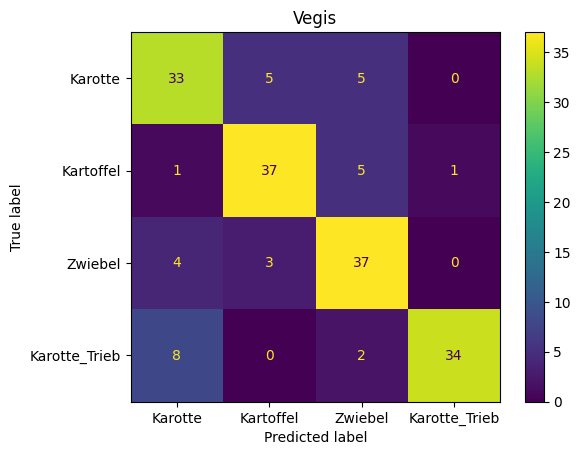

In [72]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test_scaled,
    y_test,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis")

print("Vegis")
print(disp.confusion_matrix)

In [76]:
accuracy_testdata = accuracy_score(y_test, y_test_pred)
accuracy_traindata = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

number_correct_testdata = accuracy_score(y_test, y_test_pred, normalize=False)
number_correct_traindata = accuracy_score(y_train, y_train_pred, normalize=False)
print(f"Number Correct Predicions Test: {number_correct_testdata}\nNumber Correct Predicions Train: {number_correct_traindata}")

Accuracy Test: 0.8057142857142857
Accuracy Train: 0.8424068767908309
Number Correct Predicions Test: 141
Number Correct Predicions Train: 588


In [11]:
green_pixels_df = vegi_df.loc[vegi_df['green pixels'] > 100]
print(green_pixels_df.head(5))
print(green_pixels_df['Label'].value_counts())

    Hight  Width    R    G   B  green pixels      Label
84    183    120  123  100  55           174  Kartoffel
95    158    130  118   96  77           318  Kartoffel
96    147    125  118   95  75           272  Kartoffel
97    183    127  115   91  69           490  Kartoffel
98    173    134  115   94  73           532  Kartoffel
Label
Karotte_Trieb    197
Zwiebel           25
Karotte           21
Kartoffel          6
Name: count, dtype: int64
